In [1]:
import pyforest 

In [2]:
df = pd.read_csv('./FuelConsumption.csv')
df.head()

<IPython.core.display.Javascript object>

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066
MODELYEAR,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,...,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
MAKE,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,...,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO
MODEL,ILX,ILX,ILX HYBRID,MDX 4WD,RDX AWD,RLX,TL,TL AWD,TL AWD,TSX,...,S60 AWD,S60 AWD,S80,S80 AWD,XC60,XC60 AWD,XC60 AWD,XC70 AWD,XC70 AWD,XC90 AWD
VEHICLECLASS,COMPACT,COMPACT,COMPACT,SUV - SMALL,SUV - SMALL,MID-SIZE,MID-SIZE,MID-SIZE,MID-SIZE,COMPACT,...,COMPACT,COMPACT,MID-SIZE,MID-SIZE,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - STANDARD
ENGINESIZE,2,2.4,1.5,3.5,3.5,3.5,3.5,3.7,3.7,2.4,...,2.5,3,3.2,3,3.2,3,3.2,3,3.2,3.2
CYLINDERS,4,4,4,6,6,6,6,6,6,4,...,5,6,6,6,6,6,6,6,6,6
TRANSMISSION,AS5,M6,AV7,AS6,AS6,AS6,AS6,AS6,M6,AS5,...,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6
FUELTYPE,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,X,X,X,X,X,X,X,X,X,X
FUELCONSUMPTION_CITY,9.9,11.2,6,12.7,12.1,11.9,11.8,12.8,13.4,10.6,...,11.6,13.2,11.9,13.2,13,13.4,13.2,13.4,12.9,14.9
FUELCONSUMPTION_HWY,6.7,7.7,5.8,9.1,8.7,7.7,8.1,9,9.5,7.5,...,8.3,9.5,8.1,9.5,8.9,9.8,9.5,9.8,9.3,10.2


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [9]:
# viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
# # viz.hist()
# # plt.show()
# sns.set()
# plt.hist(viz) 
# plt.figure(figsize=(14,6))
# plt.title('Comparing the variables in graphical format')
# plt.xlabel('their dependent varable')
# plt.ylabel('the independent variable')
# plt.legend()
# plt.show()

In [10]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
sns.set()
plt.figure(figsize=(12,5))
viz.hist()
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x500 with 0 Axes>

<Figure size 640x480 with 4 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

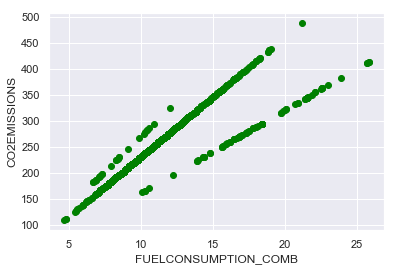

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

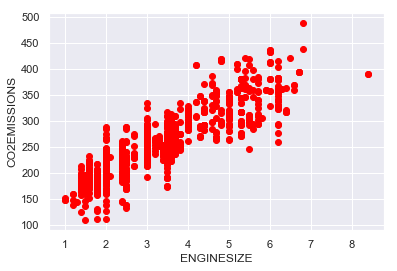

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

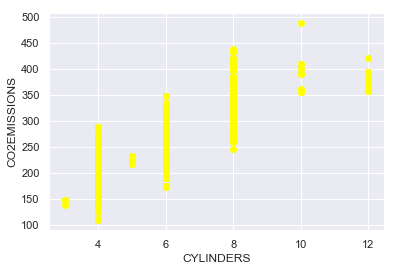

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='yellow')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [14]:
check = np.random.rand(len(cdf))  < 0.8
train = cdf[check]
test = cdf[~check]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

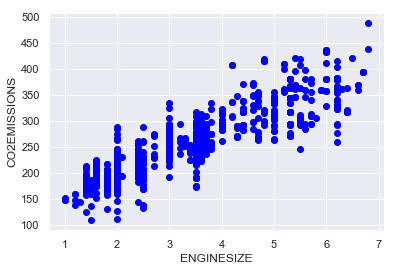

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficient:', regr.coef_)
print('Intercept: ',regr.intercept_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Coefficient: [[39.32784188]]
Intercept:  [124.50734068]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

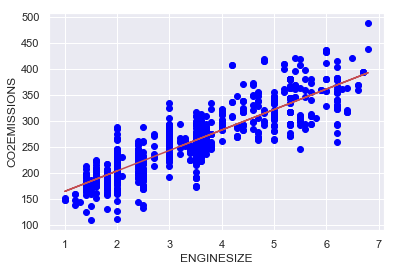

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [19]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print('Mean Absolutely error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual Sum of Square (MSE): %.2f' % np.mean(np.absolute(test_y_ - test_y)** 2))
print('r2-SCORE: %.2F'  % r2_score(test_y_, test_y))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Absolutely error: 23.40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Residual Sum of Square (MSE): 957.52
r2-SCORE: 0.69
